In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

In [7]:
base = pd.read_csv("CARDIO_BASE.csv", delimiter=';')
print(base.head())

   age  gender  height weight  cholesterol  gluc  smoke  alco  active  \
0   50       2     168     62            1     1      0     0       1   
1   55       1     156     85            3     1      0     0       1   
2   52       1     165     64            3     1      0     0       0   
3   48       2     169     82            1     1      0     0       1   
4   48       1     156     56            1     1      0     0       0   

   cardio_disease  
0               0  
1               1  
2               1  
3               1  
4               0  


age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target

In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


In [12]:
# Remove espaços, vírgulas se houver
base['weight'] = base['weight'].astype(str).str.replace(',', '.')
base['weight'] = base['weight'].str.extract(r'(\d+\.?\d*)')  # extrai apenas números
base['weight'] = pd.to_numeric(base['weight'], errors='coerce')

In [14]:
print(base['weight'].isnull().sum())

0


In [15]:
# Ver valores nulos
print(base.isnull().sum())

age               0
gender            0
height            0
weight            0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio_disease    0
dtype: int64


In [16]:
# Estatísticas
print(base.describe())

                age        gender        height        weight   cholesterol  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      53.288300      1.345400    164.308200     74.303710      1.365000   
std        6.796234      0.475522      8.178796     14.566353      0.677658   
min       30.000000      1.000000     70.000000     30.000000      1.000000   
25%       48.000000      1.000000    159.000000     65.000000      1.000000   
50%       54.000000      1.000000    165.000000     72.000000      1.000000   
75%       58.000000      2.000000    170.000000     82.000000      2.000000   
max       65.000000      2.000000    250.000000    200.000000      3.000000   

               gluc         smoke          alco        active  cardio_disease  
count  10000.000000  10000.000000  10000.000000  10000.000000    10000.000000  
mean       1.222200      0.089000      0.053700      0.797200        0.503100  
std        0.565561      0.284758      0.225436 

In [18]:
base['gender'] = base['gender'].map({1: 'Mulher', 2: 'Homem'})
base['gender'] = base['gender'].astype('category')

In [21]:
print(base['gender'].value_counts())

gender
Mulher    6546
Homem     3454
Name: count, dtype: int64


In [22]:
numeric_cols = ['age', 'height', 'weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio_disease']
base[numeric_cols] = base[numeric_cols].apply(pd.to_numeric)

In [24]:
print(base['cholesterol'].value_counts())
print(base['gluc'].value_counts())


cholesterol
1    7487
2    1376
3    1137
Name: count, dtype: int64
gluc
1    8513
2     752
3     735
Name: count, dtype: int64


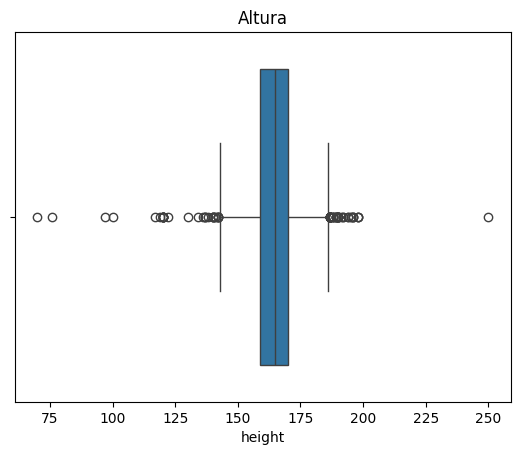

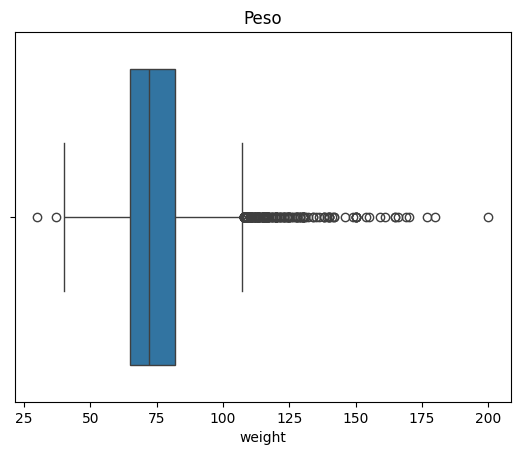

In [25]:
sns.boxplot(x=base['height'])
plt.title("Altura")
plt.show()

sns.boxplot(x=base['weight'])
plt.title("Peso")
plt.show()

# Remover outliers usando IQR
def remove_outliers_iqr(df, column):
    Q1 = base[column].quantile(0.25)
    Q3 = base[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return base[(base[column] >= lower) & (base[column] <= upper)]

df = remove_outliers_iqr(base, 'height')
df = remove_outliers_iqr(base, 'weight')


In [31]:
#Criando coluna de IMC
base['imc'] = base['weight'] / ((base['height']/100) ** 2)

In [34]:
print(base.head())

   age  gender  height  weight  cholesterol  gluc  smoke  alco  active  \
0   50   Homem     168    62.0            1     1      0     0       1   
1   55  Mulher     156    85.0            3     1      0     0       1   
2   52  Mulher     165    64.0            3     1      0     0       0   
3   48   Homem     169    82.0            1     1      0     0       1   
4   48  Mulher     156    56.0            1     1      0     0       0   

   cardio_disease        imc  
0               0  21.967120  
1               1  34.927679  
2               1  23.507805  
3               1  28.710479  
4               0  23.011177  


Gráficos analisando o comportamento da variável cardio

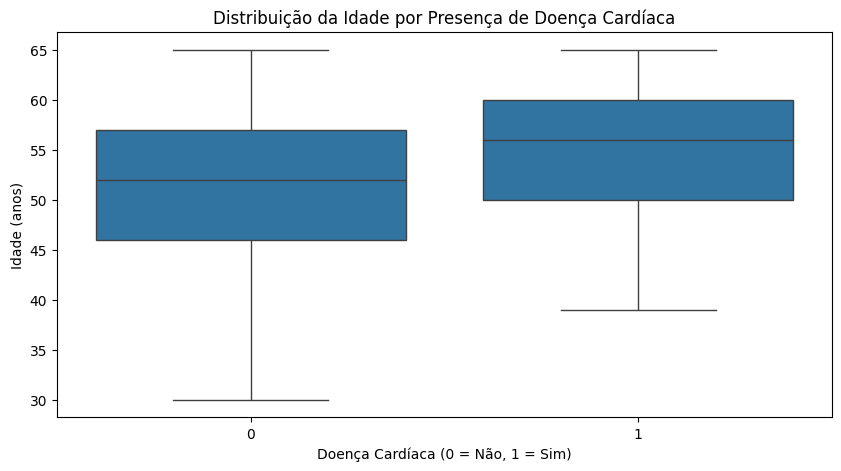

In [35]:
#Distribuição da Idade por Doença Cardíaca

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=base, x='cardio_disease', y='age')
plt.title('Distribuição da Idade por Presença de Doença Cardíaca')
plt.xlabel('Doença Cardíaca (0 = Não, 1 = Sim)')
plt.ylabel('Idade (anos)')
plt.show()
#

Observa-se que a faixa etária das pessoas com doença cardíaca está mais concentrada entre 50 e 60 anos.Isso sugere que a idade é um fator relevante, pessoas mais velhas têm mais chances de ter problemas cardíacos.

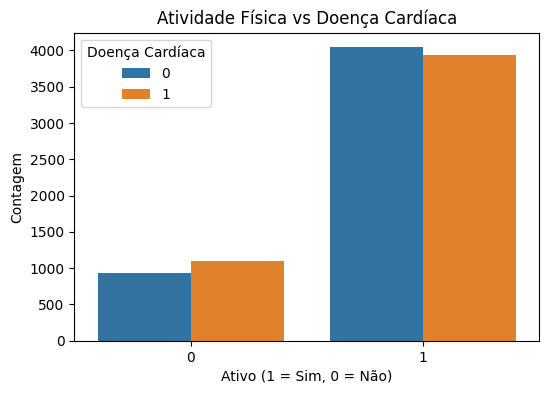

In [36]:
#Atividade Física x Doença Cardíaca

plt.figure(figsize=(6, 4))
sns.countplot(data=base, x='active', hue='cardio_disease')
plt.title('Atividade Física vs Doença Cardíaca')
plt.xlabel('Ativo (1 = Sim, 0 = Não)')
plt.ylabel('Contagem')
plt.legend(title='Doença Cardíaca')
plt.show()


Neste grafico nota-se uma leve direferença entre quem é ativo ou não, porém a quantidade de pessoas não ativas que tem problema cardiaco (cor laranja), é proporcionalmente menor comparado aos não ativos.

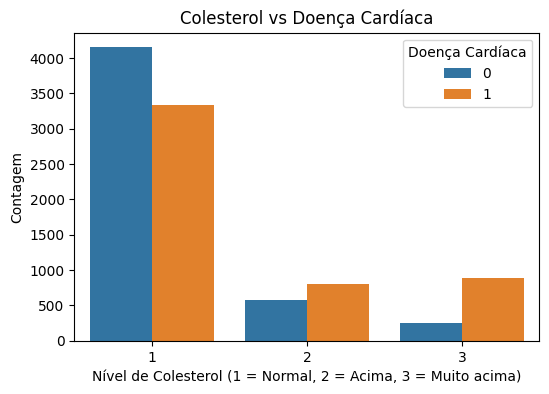

In [37]:
#Colesterol x Doença Cardíaca

plt.figure(figsize=(6, 4))
sns.countplot(data=base, x='cholesterol', hue='cardio_disease')
plt.title('Colesterol vs Doença Cardíaca')
plt.xlabel('Nível de Colesterol (1 = Normal, 2 = Acima, 3 = Muito acima)')
plt.ylabel('Contagem')
plt.legend(title='Doença Cardíaca')
plt.show()


Nota-se que cpnforme o nivel de colesterol aumenta, a proporção de pesssoas com doença cardiaca tambem aumenta.
Isso indica uma relação entre colesterol elevado e risco de doença cardiaca.

#Matriz de correlação

Matriz de Correlação:
                     age    height    weight  cholesterol      gluc     smoke  \
age             1.000000 -0.079205  0.046665     0.172934  0.091026 -0.049640   
height         -0.079205  1.000000  0.290502    -0.044984 -0.024428  0.193053   
weight          0.046665  0.290502  1.000000     0.132124  0.100919  0.066399   
cholesterol     0.172934 -0.044984  0.132124     1.000000  0.431599  0.024436   
gluc            0.091026 -0.024428  0.100919     0.431599  1.000000  0.017538   
smoke          -0.049640  0.193053  0.066399     0.024436  0.017538  1.000000   
alco           -0.043592  0.112578  0.079258     0.019636  0.013867  0.329043   
active         -0.022665 -0.010551 -0.020923     0.018799  0.004671  0.031873   
cardio_disease  0.237076 -0.008353  0.183325     0.221273  0.082441 -0.018093   
imc             0.080462 -0.259592  0.814130     0.144160  0.104777 -0.027867   

                    alco    active  cardio_disease       imc  
age            -0.04359

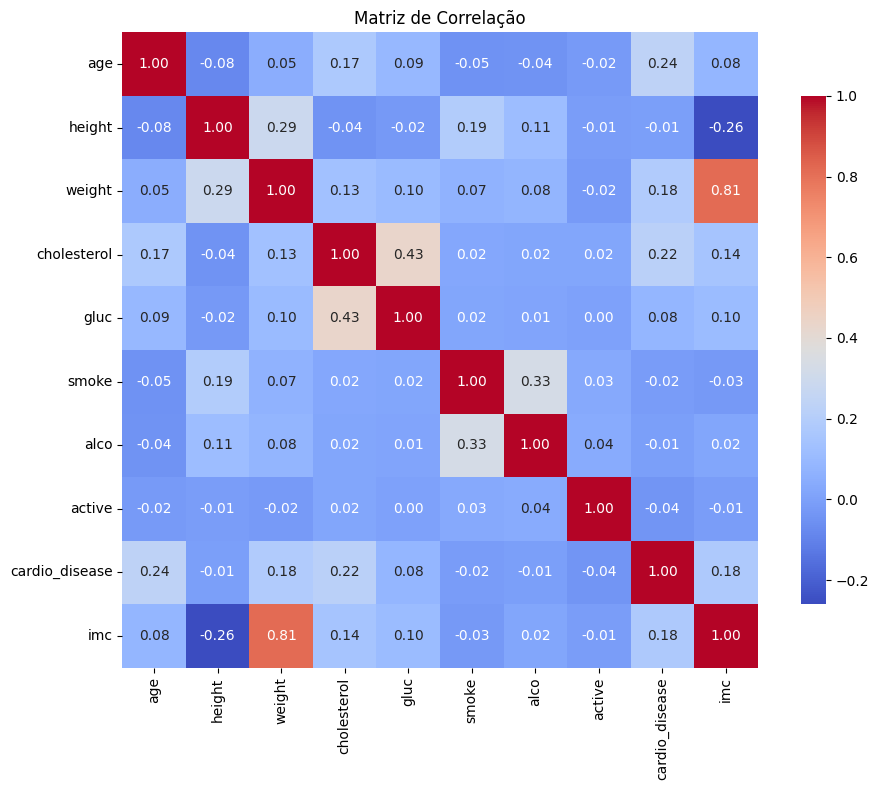

In [38]:
# Selecionar apenas colunas numéricas
numeric_cols = base.select_dtypes(include='number')

# Calcular a matriz de correlação
corr_matrix = numeric_cols.corr(method='pearson')

# Exibir a matriz de correlação
print("Matriz de Correlação:")
print(corr_matrix)

# Gerar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()

Nota-se:
Pessoas mais velhas tendem a ter mais doenças cardiacas (0.24)

Colesterol e glicose alta podem estar associados a doença cardiaca (0.22) e (0.18)

No imc esta altamente correlacionado (0.81)

alcool e fumo existe uma correlçao moderada (0.33)

Sendo as variaveis mais destacadas Idade, Colesterol, glicose e peso


In [39]:
# Separando as variáveis preditoras (X) e a variável alvo (y)
X = base.drop('cardio_disease', axis=1)  # remove a coluna alvo dos preditores
y = base['cardio_disease']              # variável alvo

# Dividindo em treino e teste (ex: 70% treino, 30% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificando as dimensões
print("Tamanho do conjunto de treino:", X_treino.shape)
print("Tamanho do conjunto de teste :", X_teste.shape)

Tamanho do conjunto de treino: (7000, 10)
Tamanho do conjunto de teste : (3000, 10)


Sem padronização, variáveis com escala maior podem influenciar excessivamente o modelo.



In [40]:
# Selecionar somente colunas numéricas (exceto variável alvo)
colunas_numericas = X.select_dtypes(include='number').columns

# Instanciando o padronizador
scaler = StandardScaler()

# Ajustar e transformar com base no conjunto de treino
X_treino[colunas_numericas] = scaler.fit_transform(X_treino[colunas_numericas])
X_teste[colunas_numericas] = scaler.transform(X_teste[colunas_numericas])

In [41]:
#Conferir se os dados estão balanceados

print(base['cardio_disease'].value_counts())
print(base['cardio_disease'].value_counts(normalize=True))  # proporções

cardio_disease
1    5031
0    4969
Name: count, dtype: int64
cardio_disease
1    0.5031
0    0.4969
Name: proportion, dtype: float64


In [42]:
# Tamanhos dos conjuntos
print("X_treino shape:", X_treino.shape)
print("y_treino shape:", y_treino.shape)
print("X_teste shape :", X_teste.shape)
print("y_teste shape :", y_teste.shape)

X_treino shape: (7000, 10)
y_treino shape: (7000,)
X_teste shape : (3000, 10)
y_teste shape : (3000,)


In [44]:
# Verificar se a coluna 'cardio_disease' ainda está presente em X_treino e X_teste
print("Colunas de X_treino:", X_treino.columns)
print("Colunas de X_teste:", X_teste.columns)

Colunas de X_treino: Index(['age', 'gender', 'height', 'weight', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'imc'],
      dtype='object')
Colunas de X_teste: Index(['age', 'gender', 'height', 'weight', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'imc'],
      dtype='object')


In [45]:
# Visualizar as primeiras linhas de X_treino
print("X_treino:")
print(X_treino.head())

# Visualizar y_treino
print("\ny_treino:")
print(y_treino.head())

# Visualizar as primeiras linhas de X_teste
print("\nX_teste:")
print(X_teste.head())

# Visualizar y_teste
print("\ny_teste:")
print(y_teste.head())


X_treino:
           age  gender    height    weight  cholesterol      gluc     smoke  \
5964 -0.041938  Mulher  0.447082  0.326683    -0.544637 -0.394431 -0.313387   
1774  1.576714  Mulher -0.166464 -0.362844     2.403901  3.147602 -0.313387   
5753  0.693813  Mulher  1.060627  0.395636     0.929632  1.376586  3.190942   
9265  1.282413   Homem -0.289173 -0.500749    -0.544637 -0.394431  3.190942   
7658 -0.189088   Homem  1.674173 -0.500749    -0.544637 -0.394431 -0.313387   

          alco    active       imc  
5964 -0.239587  0.504906  0.071592  
1774 -0.239587  0.504906 -0.272864  
5753 -0.239587  0.504906 -0.143314  
9265 -0.239587  0.504906 -0.347965  
7658 -0.239587  0.504906 -1.095329  

y_treino:
5964    0
1774    1
5753    1
9265    1
7658    0
Name: cardio_disease, dtype: int64

X_teste:
           age  gender    height    weight  cholesterol      gluc     smoke  \
7511  0.546663   Homem  0.937918 -0.155986     2.403901 -0.394431 -0.313387   
8207 -1.660589  Mulher  0.447

In [48]:
# Codificando a variável 'gender' para numérica (ex: 'Mulher' = 0, 'Homem' = 1)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_treino['gender'] = le.fit_transform(X_treino['gender'])
X_teste['gender'] = le.transform(X_teste['gender'])

# Verificando a transformação
print("X_treino com 'gender' codificado:")
print(X_treino[['gender']].head())

X_treino com 'gender' codificado:
      gender
5964       1
1774       1
5753       1
9265       0
7658       0


In [49]:
# Verificando valores ausentes
print("Valores ausentes em X_treino:")
print(X_treino.isnull().sum())
print("\nValores ausentes em X_teste:")
print(X_teste.isnull().sum())

Valores ausentes em X_treino:
age            0
gender         0
height         0
weight         0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
imc            0
dtype: int64

Valores ausentes em X_teste:
age            0
gender         0
height         0
weight         0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
imc            0
dtype: int64


In [50]:
print("Distribuição y_treino:")
print(y_treino.value_counts(normalize=True))

print("\nDistribuição y_teste:")
print(y_teste.value_counts(normalize=True))

Distribuição y_treino:
cardio_disease
1    0.503143
0    0.496857
Name: proportion, dtype: float64

Distribuição y_teste:
cardio_disease
1    0.503
0    0.497
Name: proportion, dtype: float64


#TREINANDO MODELO DE Regrssão logistica

In [51]:
modelo = LogisticRegression(random_state=42)
modelo.fit(X_treino, y_treino)

LogisticRegression(random_state=42)

In [52]:
# Realizando previsões no conjunto de teste
y_pred = modelo.predict(X_teste)

In [54]:
# Avaliação do modelo

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acuracia = accuracy_score(y_teste, y_pred)
precisao = precision_score(y_teste, y_pred)
recall = recall_score(y_teste, y_pred)
f1 = f1_score(y_teste, y_pred)
matriz_confusao = confusion_matrix(y_teste, y_pred)

print(f'Acurácia: {acuracia:.4f}')
print(f'Precisão: {precisao:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print("\nMatriz de Confusão:")
print(matriz_confusao)

Acurácia: 0.6387
Precisão: 0.6467
Recall: 0.6209
F1-Score: 0.6335

Matriz de Confusão:
[[979 512]
 [572 937]]


Verdadeiros Negativos (979): O modelo corretamente previu que essas pessoas não têm doença cardíaca.

Falsos Positivos (512): O modelo erroneamente previu que essas pessoas têm doença cardíaca, quando, na verdade, não têm.

Falsos Negativos (572): O modelo erroneamente previu que essas pessoas não têm doença cardíaca, quando, na verdade, têm.

Verdadeiros Positivos (937): O modelo corretamente previu que essas pessoas têm doença cardíaca.


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Testando diferentes valores de C para a regularização
valores_C = [0.001, 0.01, 0.1, 1, 10, 100]
melhor_acuracia = 0
melhor_modelo = None

for C_val in valores_C:
    # Criando o modelo de Regressão Logística com o valor de C
    modelo_logreg = LogisticRegression(C=C_val, random_state=42, solver='liblinear')

    # Treinando o modelo
    modelo_logreg.fit(X_treino, y_treino)

    # Realizando previsões
    y_pred = modelo_logreg.predict(X_teste)

    # Calculando a acurácia
    acuracia = accuracy_score(y_teste, y_pred)

    # Se a acurácia for a melhor, salvar o modelo
    if acuracia > melhor_acuracia:
        melhor_acuracia = acuracia
        melhor_modelo = modelo_logreg

# Avaliação do melhor modelo
y_pred_melhor = melhor_modelo.predict(X_teste)
acuracia_melhor = accuracy_score(y_teste, y_pred_melhor)
precisao_melhor = precision_score(y_teste, y_pred_melhor)
recall_melhor = recall_score(y_teste, y_pred_melhor)
f1_melhor = f1_score(y_teste, y_pred_melhor)
matriz_confusao_melhor = confusion_matrix(y_teste, y_pred_melhor)

# Exibindo os resultados
print(f'Acurácia da Regressão Logística Ajustada: {acuracia_melhor:.4f}')
print(f'Precisão da Regressão Logística Ajustada: {precisao_melhor:.4f}')
print(f'Recall da Regressão Logística Ajustada: {recall_melhor:.4f}')
print(f'F1-Score da Regressão Logística Ajustada: {f1_melhor:.4f}')
print("\nMatriz de Confusão da Regressão Logística Ajustada:")
print(matriz_confusao_melhor)


Acurácia da Regressão Logística Ajustada: 0.6403
Precisão da Regressão Logística Ajustada: 0.6485
Recall da Regressão Logística Ajustada: 0.6223
F1-Score da Regressão Logística Ajustada: 0.6351

Matriz de Confusão da Regressão Logística Ajustada:
[[982 509]
 [570 939]]


Verdadeiros Negativos (982): O modelo acertou que essas pessoas não têm a doença cardíaca.

Falsos Positivos (509): O modelo previu que essas pessoas têm a doença, quando na verdade não têm.

Falsos Negativos (570): O modelo não identificou algumas pessoas que têm a doença.

Verdadeiros Positivos (939): O modelo acertou que essas pessoas têm a doença cardíaca.

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_treino, y_treino)
y_pred_rf = rf.predict(X_teste)

print("\nRandom Forest Ajustada:")
print("Acurácia:", accuracy_score(y_teste, y_pred_rf))
print("Precisão:", precision_score(y_teste, y_pred_rf))
print("Recall:", recall_score(y_teste, y_pred_rf))
print("F1-Score:", f1_score(y_teste, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred_rf))



Random Forest Ajustada:
Acurácia: 0.6353333333333333
Precisão: 0.6357096141268803
Recall: 0.6441351888667992
F1-Score: 0.6398946675444371
Matriz de Confusão:
 [[934 557]
 [537 972]]


In [66]:

# Acessando intercepto e coeficientes
intercept = modelo_rl.intercept_
coeficientes = modelo_rl.coef_

# Criando um DataFrame com os nomes das variáveis
import pandas as pd

colunas = X_treino.columns
df_coeficientes = pd.DataFrame({
    'Variável': colunas,
    'Coeficiente': coeficientes[0]
})

print("Intercepto da Regressão Logística:")
print(intercept)
print("\nCoeficientes por variável:")
print(df_coeficientes.sort_values(by='Coeficiente', key=abs, ascending=False))


Intercepto da Regressão Logística:
[0.04826588]

Coeficientes por variável:
      Variável  Coeficiente
3       weight     0.485882
0          age     0.430966
4  cholesterol     0.414818
2       height    -0.151782
9          imc    -0.106121
8       active    -0.091351
5         gluc    -0.054176
1       gender    -0.028121
6        smoke    -0.019306
7         alco    -0.006091


In [67]:
from sklearn.linear_model import LogisticRegression

modelo_rl = LogisticRegression(max_iter=1000, solver='lbfgs')
modelo_rl.fit(X_treino, y_treino)

LogisticRegression(max_iter=1000)

In [68]:
# Intercepto
intercept = modelo_rl.intercept_

# Coeficientes
coeficientes = modelo_rl.coef_

# Organizando com os nomes das variáveis
import pandas as pd

colunas = X_treino.columns
df_coeficientes = pd.DataFrame({
    'Variável': colunas,
    'Coeficiente': coeficientes[0]
})

# Exibindo resultados
print("Intercepto da Regressão Logística:")
print(intercept)

print("\nCoeficientes por variável:")
print(df_coeficientes.sort_values(by='Coeficiente', key=abs, ascending=False))


Intercepto da Regressão Logística:
[0.04826588]

Coeficientes por variável:
      Variável  Coeficiente
3       weight     0.485882
0          age     0.430966
4  cholesterol     0.414818
2       height    -0.151782
9          imc    -0.106121
8       active    -0.091351
5         gluc    -0.054176
1       gender    -0.028121
6        smoke    -0.019306
7         alco    -0.006091


In [69]:
# Remove a variável 'imc' dos conjuntos de treino e teste
X_treino_sem_imc = X_treino.drop(columns=['imc'])
X_teste_sem_imc = X_teste.drop(columns=['imc'])

# Treina a regressão logística sem o imc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

modelo_sem_imc = LogisticRegression(max_iter=1000)
modelo_sem_imc.fit(X_treino_sem_imc, y_treino)

# Faz previsões
y_pred_sem_imc = modelo_sem_imc.predict(X_teste_sem_imc)

# Avaliação
print("Acurácia:", accuracy_score(y_teste, y_pred_sem_imc))
print("Precisão:", precision_score(y_teste, y_pred_sem_imc))
print("Recall:", recall_score(y_teste, y_pred_sem_imc))
print("F1-Score:", f1_score(y_teste, y_pred_sem_imc))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_sem_imc))


Acurácia: 0.6393333333333333
Precisão: 0.647955647955648
Recall: 0.6196156394963552
F1-Score: 0.6334688346883469

Matriz de Confusão:
[[983 508]
 [574 935]]


In [70]:
from sklearn.linear_model import LogisticRegression

# Regressão logística com L1 (Lasso)
modelo_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
modelo_l1.fit(X_treino, y_treino)

# Ver coeficientes
coef_l1 = modelo_l1.coef_[0]
df_l1 = pd.DataFrame({'Variável': X_treino.columns, 'Coef_L1': coef_l1})
print(df_l1[df_l1['Coef_L1'] != 0].sort_values(by='Coef_L1', key=abs, ascending=False))


      Variável   Coef_L1
3       weight  0.464234
0          age  0.431238
4  cholesterol  0.413905
2       height -0.137464
8       active -0.090518
9          imc -0.084046
5         gluc -0.053519
6        smoke -0.017621
1       gender -0.016700
7         alco -0.004828


In [73]:
import numpy as np
df_coeficientes['Odds Ratio'] = np.exp(df_coeficientes['Coeficiente'])
print(df_coeficientes.sort_values(by='Odds Ratio', ascending=False))


      Variável  Coeficiente  Odds Ratio
3       weight     0.485882    1.625609
0          age     0.430966    1.538743
4  cholesterol     0.414818    1.514095
7         alco    -0.006091    0.993928
6        smoke    -0.019306    0.980880
1       gender    -0.028121    0.972271
5         gluc    -0.054176    0.947266
8       active    -0.091351    0.912698
9          imc    -0.106121    0.899316
2       height    -0.151782    0.859175


In [74]:
pip install imbalanced-learn


In [75]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Inicializar o SMOTE
smote = SMOTE(random_state=42)

# Aplicando o SMOTE ao conjunto de treino
X_treino_smote, y_treino_smote = smote.fit_resample(X_treino, y_treino)

# Verificando a distribuição após o SMOTE
print(f"Distribuição original de y_treino: {Counter(y_treino)}")
print(f"Distribuição após o SMOTE: {Counter(y_treino_smote)}")

# Treinando o modelo novamente com o novo conjunto balanceado
modelo_rl = LogisticRegression(max_iter=1000, solver='liblinear')
modelo_rl.fit(X_treino_smote, y_treino_smote)

# Realizando as previsões
y_pred_smote = modelo_rl.predict(X_teste)

# Avaliando as métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acuracia_smote = accuracy_score(y_teste, y_pred_smote)
precisao_smote = precision_score(y_teste, y_pred_smote)
recall_smote = recall_score(y_teste, y_pred_smote)
f1_smote = f1_score(y_teste, y_pred_smote)
matriz_confusao_smote = confusion_matrix(y_teste, y_pred_smote)

# Exibindo os resultados
print(f"Acurácia após SMOTE: {acuracia_smote}")
print(f"Precisão após SMOTE: {precisao_smote}")
print(f"Recall após SMOTE: {recall_smote}")
print(f"F1-Score após SMOTE: {f1_smote}")
print(f"Matriz de Confusão após SMOTE:\n{matriz_confusao_smote}")


Distribuição original de y_treino: Counter({1: 3522, 0: 3478})
Distribuição após o SMOTE: Counter({0: 3522, 1: 3522})
Acurácia após SMOTE: 0.6373333333333333
Precisão após SMOTE: 0.6481351161154116
Recall após SMOTE: 0.610337972166998
F1-Score após SMOTE: 0.6286689419795222
Matriz de Confusão após SMOTE:
[[991 500]
 [588 921]]


In [77]:
# Faz previsões
y_pred_sem_imc = modelo_sem_imc.predict(X_teste_sem_imc)

# Avaliação
print("Acurácia:", accuracy_score(y_teste, y_pred_sem_imc))
print("Precisão:", precision_score(y_teste, y_pred_sem_imc))
print("Recall:", recall_score(y_teste, y_pred_sem_imc))
print("F1-Score:", f1_score(y_teste, y_pred_sem_imc))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_sem_imc))

Acurácia: 0.6393333333333333
Precisão: 0.647955647955648
Recall: 0.6196156394963552
F1-Score: 0.6334688346883469

Matriz de Confusão:
[[983 508]
 [574 935]]


Foi realizado o balanceamento das classes com Smote
F1-Score de 63.35%: o modelo está equilibrando bem a necessidade de não fazer muitas previsões falsas e a necessidade de identificar corretamente os casos de doença cardíaca.


In [78]:
# Aplicar o modelo ao conjunto de teste
y_pred_teste = modelo_rl.predict(X_teste)

# Avaliar as previsões no conjunto de teste
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Cálculo das métricas
acuracia_teste = accuracy_score(y_teste, y_pred_teste)
precisao_teste = precision_score(y_teste, y_pred_teste)
recall_teste = recall_score(y_teste, y_pred_teste)
f1_teste = f1_score(y_teste, y_pred_teste)

# Matriz de confusão
matriz_confusao_teste = confusion_matrix(y_teste, y_pred_teste)

# Exibindo os resultados
print(f"Acurácia do modelo nos dados de teste: {acuracia_teste:.4f}")
print(f"Precisão do modelo nos dados de teste: {precisao_teste:.4f}")
print(f"Recall do modelo nos dados de teste: {recall_teste:.4f}")
print(f"F1-Score do modelo nos dados de teste: {f1_teste:.4f}")
print("Matriz de Confusão nos dados de teste:")
print(matriz_confusao_teste)


Acurácia do modelo nos dados de teste: 0.6373
Precisão do modelo nos dados de teste: 0.6481
Recall do modelo nos dados de teste: 0.6103
F1-Score do modelo nos dados de teste: 0.6287
Matriz de Confusão nos dados de teste:
[[991 500]
 [588 921]]


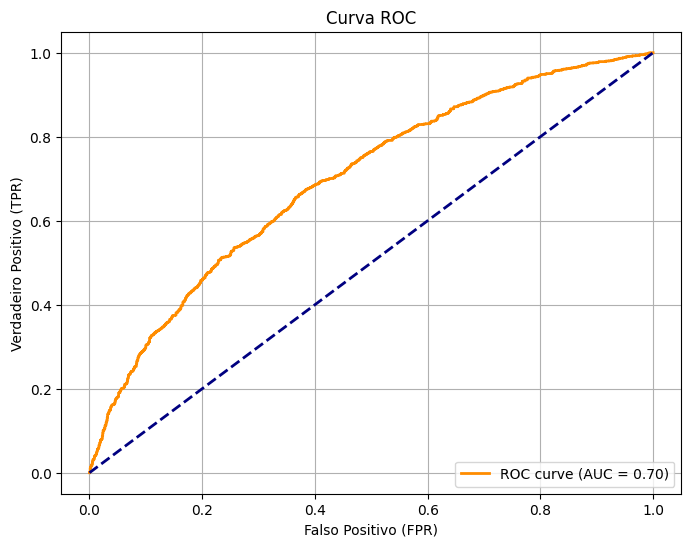

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obter as probabilidades de previsão para a classe positiva (1)
y_prob_teste = modelo_rl.predict_proba(X_teste)[:, 1]

# Calcular as taxas de verdadeiro positivo (TPR) e falso positivo (FPR)
fpr, tpr, thresholds = roc_curve(y_teste, y_prob_teste)

# Calcular a AUC (Área Sob a Curva)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha de chance aleatória
plt.xlabel('Falso Positivo (FPR)')
plt.ylabel('Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


O modelo treinado apresenta 0.70 de AUC considerando um valor moderado. APós aplicar o balancemanto com a técnica SMOTe, Odds Ratio, seguirei com o modelo


A regressão logística é um modelo estatístico utilizado para prever a probabilidade de uma variável dependente categórica, especialmente quando essa variável tem apenas dois valores possíveis, como 0 e 1, ou "sim" e "não
 Seu objetivo principal é atribuir uma classe a uma observação com base em um conjunto de características ou variáveis independentes.
 A regressão logistica tem da regressão linear principalmente em sua estrutura e no conceito básico de modelagem preditiva Ambos os modelos utilizam uma combinação linear das variáveis independentes (ou preditoras) para fazer previsões. A diferença é que, enquanto a regressão linear modela uma variável dependente contínua, a regressão logística modela a probabilidade de uma variável dependente categórica